# Mini Projeto 1:

Processo de Construção, Treinamento, Avaliação e Seleção de Modelos para Classificação

In [1]:
# Importando bibliotecas:
from platform import python_version
print('Versão Python:', python_version(), '\n')

import joblib # Para salvar e carregar o modelo
import pickle # Para salvar e carregar o modelo
import numpy as np # Para manipulação de arrays
import pandas as pd # Para manipulação de dataframes
import seaborn as sns # Para visualização de dados
from matplotlib import pyplot as plt # Para visualização de dados
from sklearn.model_selection import train_test_split # Para dividir o dataset em treino e teste
from sklearn.model_selection import GridSearchCV # Para otimizar os hiperparâmetros do modelo
from sklearn.model_selection import cross_val_score # Para avaliar o modelo
from sklearn.model_selection import RandomizedSearchCV # Para otimizar o modelo
from sklearn.linear_model import LogisticRegression # Para criar o modelo de Regressão Logística
from sklearn.ensemble import RandomForestClassifier # Para criar o modelo de Random Forest
from sklearn.neighbors import KNeighborsClassifier # Para criar o modelo de KNN (K-Nearest Neighbors)
from sklearn.tree import DecisionTreeClassifier # Para criar o modelo de Árvore de Decisão
from sklearn.svm import SVC # Para criar o modelo de SVM (Support Vector Machine)
from sklearn.metrics import accuracy_score # Para avaliar o modelo
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix # Para avaliar o modelo
import imblearn # Biblioteca para balanceamento de classes
from imblearn.over_sampling import SMOTE # Técnica de Over-sampling que cria novas amostras da classe minoritária

import warnings
warnings.filterwarnings('ignore') # Ignorar warnings

%reload_ext watermark
%watermark -a "gustavogzr" --iversions

Versão Python: 3.11.1 

Author: gustavogzr

seaborn   : 0.12.2
joblib    : 1.3.2
pandas    : 2.0.3
matplotlib: 3.7.2
imblearn  : 0.0
numpy     : 1.25.2



## Importando o dataset

In [2]:
dados = pd.read_csv('.arquivos_DSA/dados/dataset.csv')
dados.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
dados.shape

(583, 11)

In [4]:
dados.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [5]:
dados.sample(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
149,60,Male,0.8,0.2,286,21,27,7.1,4.0,1.20,1
170,72,Male,1.7,0.8,200,28,37,6.2,3.0,0.93,1
438,65,Male,0.8,0.2,162,30,90,3.8,1.4,0.50,1
421,26,Male,1.0,0.3,163,48,71,7.1,3.7,1.00,2
111,48,Male,3.2,1.6,257,33,116,5.7,2.2,0.62,1
102,17,Male,0.9,0.2,224,36,45,6.9,4.2,1.55,1
287,43,Male,1.3,0.6,155,15,20,8.0,4.0,1.00,2
290,45,Female,1.0,0.3,250,48,44,8.6,4.3,1.00,1
196,60,Male,2.0,1.1,664,52,104,6.0,2.1,0.53,1
95,75,Male,0.9,0.2,282,25,23,4.4,2.2,1.00,1


## Análise Exploratória dos Dados

In [6]:
dados.dtypes # Verificando os tipos de dados

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [7]:
# listar colunas com valores categóricos
dados.dtypes[dados.dtypes == 'object']

Gender    object
dtype: object

In [8]:
# listar colunas com valores numéricos
dados.dtypes[dados.dtypes != 'object']

Age                             int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

## Exploração das Variáveis	Númericas

In [9]:
dados.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


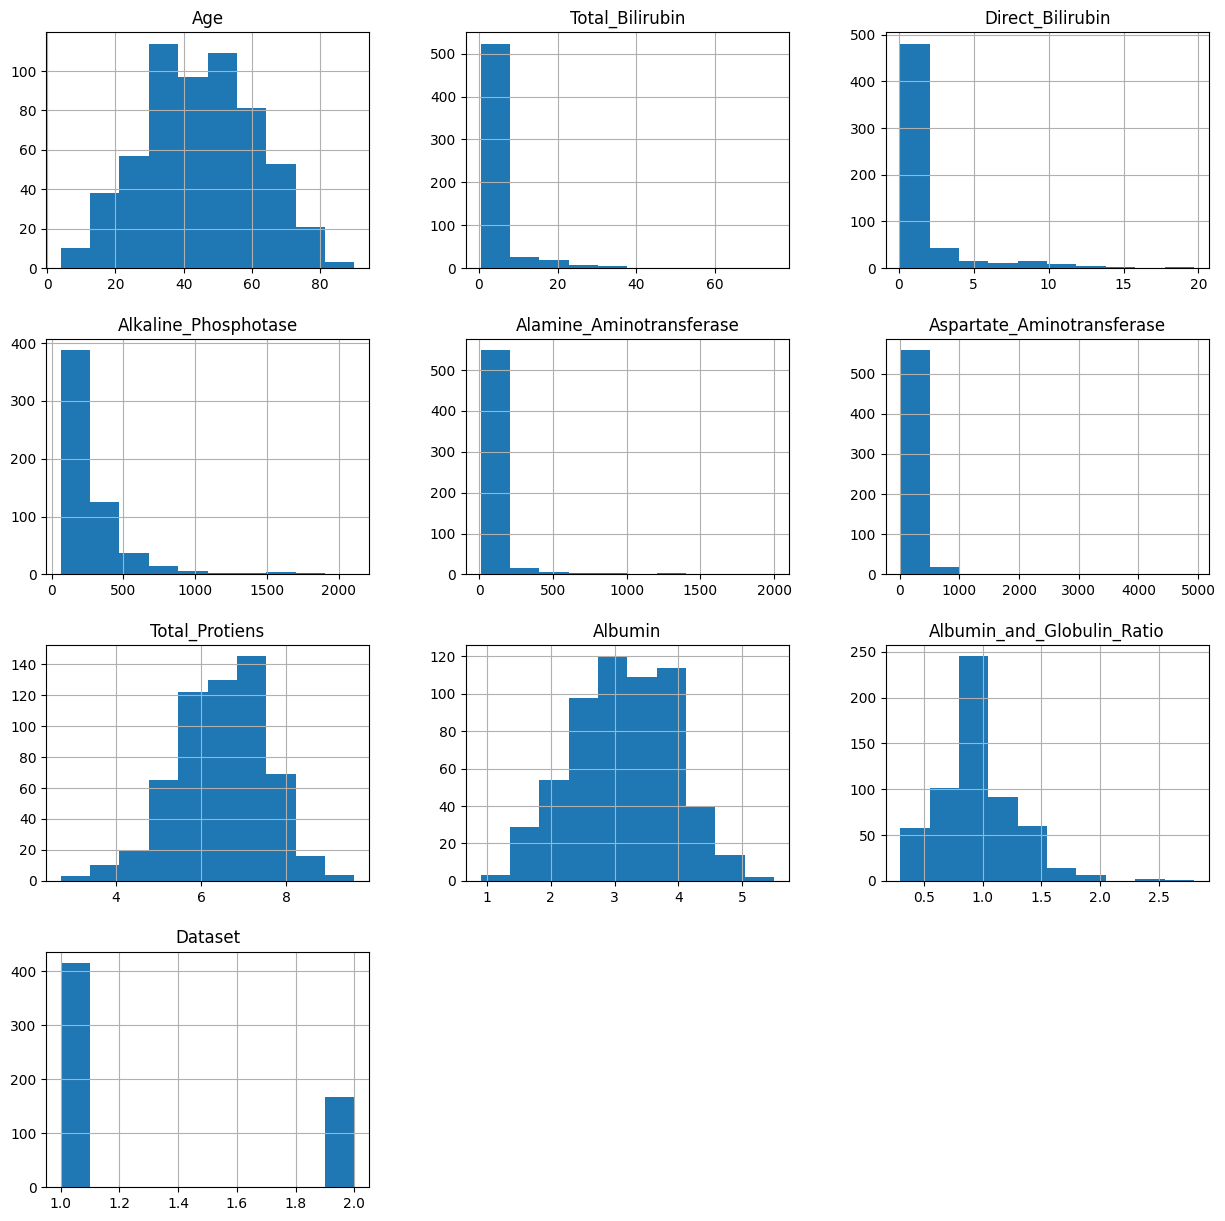

In [10]:
# Histograma das variáveis numéricas
dados.hist(figsize=(15,15), bins = 10)
plt.show()

In [11]:
# Função para ajustar os dados da coluna Dataset
# 1 -> Doente (está ok no dataset)
# 2 -> Saudável -> Alterar para 0
def ajustar_var(x):
    if x == 2:
        return 0
    return x

# Aplicando a função
dados['Dataset'] = dados['Dataset'].apply(ajustar_var)
# Ajustar nome da coluna
dados.rename({'Dataset': 'Target'}, axis='columns', inplace=True)
# Verificando a alteração
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
98,18,Male,0.6,0.1,265,97,161,5.9,3.1,1.1,1
157,72,Male,0.7,0.1,196,20,35,5.8,2.0,0.5,1
311,54,Female,23.2,12.6,574,43,47,7.2,3.5,0.9,1
260,42,Male,16.4,8.9,245,56,87,5.4,2.0,0.5,1
115,50,Male,7.3,3.6,1580,88,64,5.6,2.3,0.6,0


In [12]:
# Correlação entre as variáveis numéricas
colunas_numericas = dados.dtypes[dados.dtypes != 'object'].index
dados[colunas_numericas].corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131
Target,0.137351,0.220208,0.246046,0.184866,0.163416,0.151934,-0.035008,-0.161388,-0.163131,1.000000


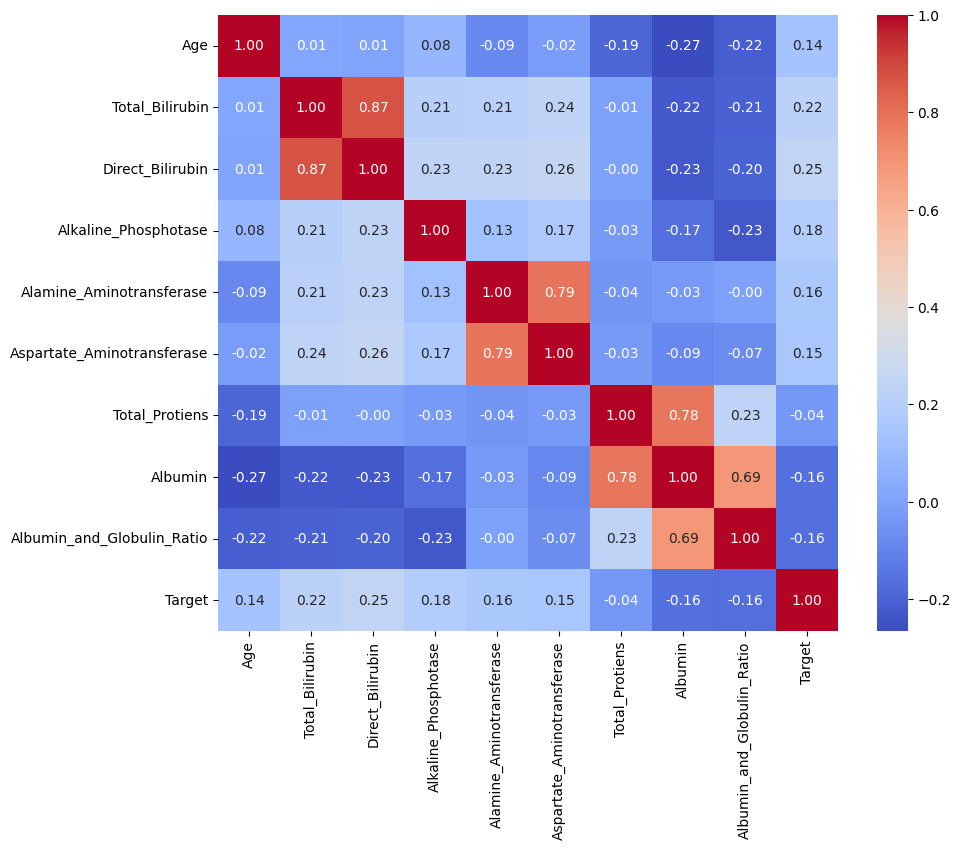

In [13]:
# Construindo um heatmap
plt.figure(figsize=(10,8))
sns.heatmap(dados[colunas_numericas].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

## Exploração da Variável Categórica

In [14]:
dados.describe(include=['object'])

,Gender
count,583
unique,2
top,Male
freq,441


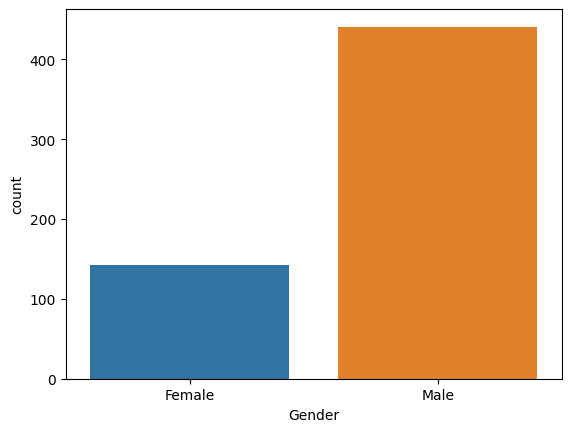

Número de pacientes do sexo masculino: 441
Número de pacientes do sexo feminino: 142


In [15]:
# Plot
sns.countplot(data = dados, x = 'Gender', label='Count')
plt.show()

# Contagem de valores únicos
M, F = dados['Gender'].value_counts()

# Print
print('Número de pacientes do sexo masculino:', M)
print('Número de pacientes do sexo feminino:', F)

In [16]:
# Ajustando a coluna Gender utilizando label encoding (0 e 1)
def encoding_gender_func(x):
    if x == 'Male':
        return 0
    return 1
# Aplicando a função
dados['Gender'] = dados['Gender'].apply(encoding_gender_func)
# Verificando a alteração
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
417,11,0,0.7,0.1,592,26,29,7.1,4.2,1.4,0
494,25,0,0.7,0.2,185,196,401,6.5,3.9,1.5,1
228,65,1,1.0,0.3,202,26,13,5.3,2.6,0.9,0
369,58,1,0.8,0.2,130,24,25,7.0,4.0,1.3,1
19,40,1,0.9,0.3,293,232,245,6.8,3.1,0.8,1


## Verificação a Relação entre Atributos

In [17]:
dados.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


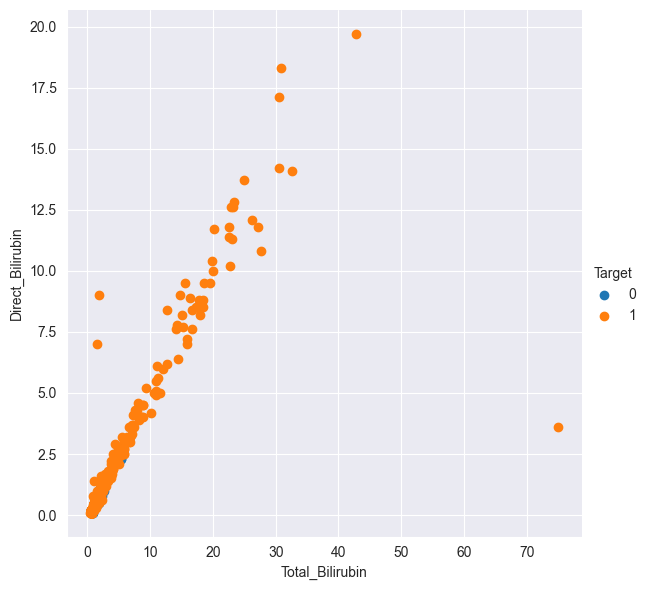

In [18]:
# Definir o estilo de background
sns.set_style('darkgrid')

# Facetgrid: utilizado para plotar múltiplos gráficos
sns.FacetGrid(dados, # Dataset
              hue='Target', # Variável alvo utilizada para colorir os pontos
              height=6
              ).map(plt.scatter,
                             'Total_Bilirubin',
                             'Direct_Bilirubin').add_legend()
plt.show()

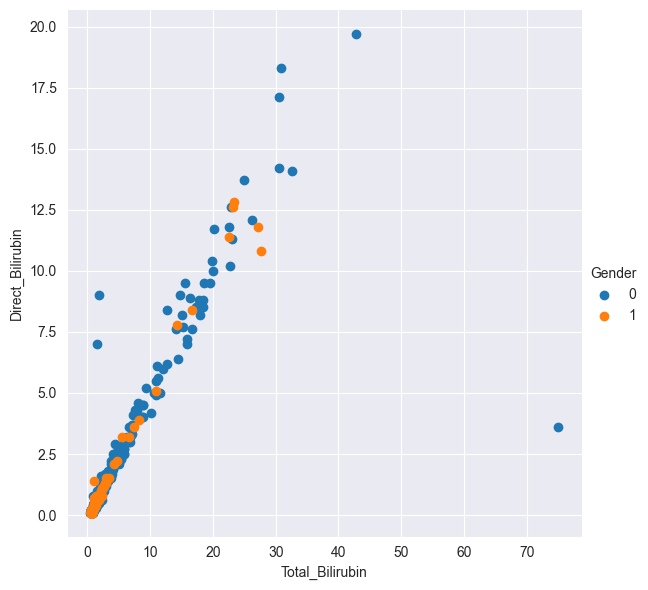

In [19]:
# Facetgrid: utilizado para plotar múltiplos gráficos
sns.FacetGrid(dados, # Dataset
              hue='Gender', # Variável alvo utilizada para colorir os pontos
              height=6
              ).map(plt.scatter,
                             'Total_Bilirubin',
                             'Direct_Bilirubin').add_legend()
plt.show()

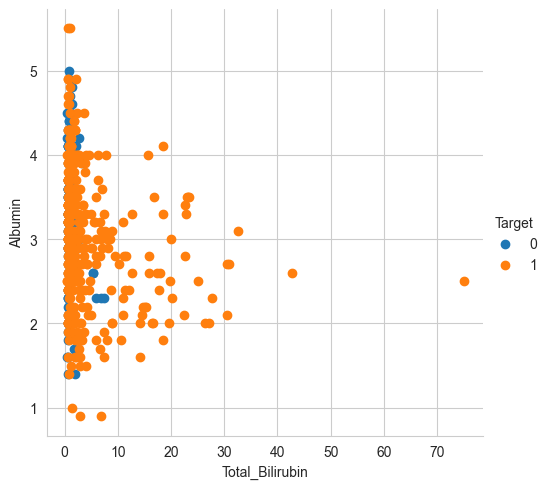

In [20]:
# Alterando o estilo de background
sns.set_style('whitegrid')

# Facetgrid: utilizado para plotar múltiplos gráficos
sns.FacetGrid(dados, # Dataset
              hue='Target', # Variável alvo utilizada para colorir os pontos
              height=5
              ).map(plt.scatter,
                             'Total_Bilirubin',
                             'Albumin').add_legend()
plt.show()

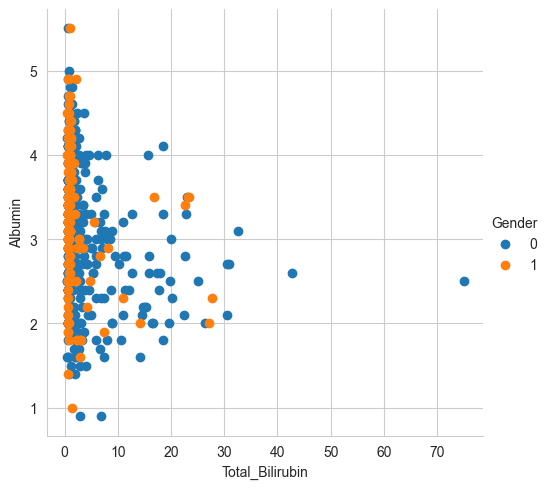

In [21]:
sns.FacetGrid(dados, # Dataset
              hue='Gender', # Variável alvo utilizada para colorir os pontos
              height=5
              ).map(plt.scatter,
                             'Total_Bilirubin',
                             'Albumin').add_legend()
plt.show()

## Verificando valores ausentes ou duplicados

In [22]:
dados[dados.isnull().values] # Verificando valores nulos

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,0,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [23]:
# Verificando existência de valores duplicados
dados[dados.duplicated(keep=False)] # keep = False mostra todas as duplicatas

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
18,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
34,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
54,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1


## Limpeza de Dados

### Tratamento de Registros Duplicados

In [24]:
dados.shape

(583, 11)

In [25]:
# Remoção de valores duplicados
dados.drop_duplicates(inplace=True)
dados.shape

(570, 11)

### Tratamento de Outliers

In [26]:
dados.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,566.000000,570.000000
mean,44.849123,0.245614,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.948004,0.712281
std,16.242182,0.430829,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.319635,0.453097
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


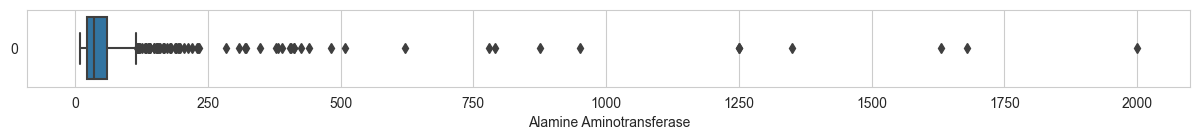

In [27]:
# Boxplot
plt.figure(figsize=(15,1))
sns.boxplot(dados.Alamine_Aminotransferase, orient='h')
plt.xlabel('Alamine Aminotransferase')
plt.show()

Será que os valores extremos são realmente outliers para a variável Alamine_Aminotransferase?

In [28]:
dados.Alamine_Aminotransferase.sort_values(ascending=False).head(10)

117    2000
27     1680
47     1630
118    1350
135    1250
119    1250
207     950
25      875
199     790
479     779
Name: Alamine_Aminotransferase, dtype: int64

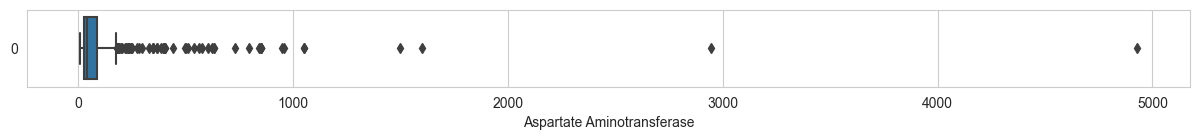

In [29]:
# Boxplot
plt.figure(figsize=(15,1))
sns.boxplot(dados.Aspartate_Aminotransferase, orient='h')
plt.xlabel('Aspartate Aminotransferase')
plt.show()

In [30]:
# Remoção de outliers
dados = dados[dados['Aspartate_Aminotransferase'] <= 2500]
dados.shape

(568, 11)

In [31]:
dados.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,564.000000,568.000000
mean,44.834507,0.246479,3.291197,1.482042,290.482394,74.286972,95.901408,6.496831,3.150000,0.948174,0.711268
std,16.237569,0.431340,6.257583,2.826056,243.271522,155.240601,171.956479,1.089500,0.797571,0.319301,0.453573
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,175.750000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.000000,86.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,1680.000000,1600.000000,9.600000,5.500000,2.800000,1.000000


### Tratamento de Valores Ausentes

In [32]:
# Verificar se tem valores ausentes
dados.isnull().values.any()

True

In [33]:
# Quantas colunas possuem valores ausentes
dados.isnull().values.any().sum()

1

In [34]:
# Listar dados ausentes
dados[dados.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,0,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [35]:
dados.shape

(568, 11)

In [36]:
# Remoção registros com valores ausentes em qualquer coluna
dados.dropna(how='any', inplace=True)
dados.shape

(564, 11)

In [37]:
# Verificar se tem valores ausentes
dados.isnull().values.any()

False

## Pré-processamento dos Dados para construção do Modelo de Machine Learning

In [38]:
# Dado a alta correlação entre as variáveis Direct_Bilirubin e Total_Bilirubin, vamos remover a variável Direct_Bilirubin
dados.drop('Direct_Bilirubin', axis=1, inplace=True)
dados.shape

(564, 10)

### Divisão de Treino e Teste

In [39]:
# Criar objeto exclusivo para a variável alvo
y = dados['Target']

In [40]:
# Criar objeto com as variáveis preditoras
X = dados.drop('Target', axis=1)

In [41]:
# Dividir o dataset em treino e teste com amostragem estratificada (mesma proporção de classes do dataset original)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25, # 25% para teste
                                                    stratify=y, # Estratificação dos dados
                                                    random_state=1234) # Definir uma semente para reprodução dos resultados

In [42]:
len(X_train), len(X_test)

(423, 141)

In [43]:
# Shape de todos os conjuntos
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((423, 9), (141, 9), (423,), (141,))

In [44]:
X_train.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
205,45,0,2.5,163,28,22,7.6,4.0,1.1
390,72,0,0.8,148,23,35,6.0,3.0,1.0
137,18,0,0.8,282,72,140,5.5,2.5,0.8
54,42,0,8.9,272,31,61,5.8,2.0,0.5
502,42,0,0.8,127,29,30,4.9,2.7,1.2


### Balanceamento de Classe

In [45]:
y_train.value_counts()

Target
1    301
0    122
Name: count, dtype: int64

In [46]:
# Vamos aplicar a técnica de Over-sampling SMOTE para balancear as classes. Essa técnica cria novas amostras da classe minoritária.
over_sampler = SMOTE(k_neighbors=2)

In [47]:
# Aplicar o método fit_resample aos dados de treino
X_balanceado, y_balanceado = over_sampler.fit_resample(X_train, y_train) # Aplicar a técnica de Over-sampling.
# X_balanceado e y_balanceado são os dados balanceados

In [48]:
X_balanceado.shape, y_balanceado.shape

((602, 9), (602,))

In [49]:
y_balanceado.value_counts() # Verificar se as classes estão balanceadas

Target
1    301
0    301
Name: count, dtype: int64

In [50]:
# Utilizar os dados balanceados para treinar o modelo
X_train = X_balanceado
y_train = y_balanceado

### Padronização dos Dados

In [51]:
X_train.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,45,0,2.5,163,28,22,7.6,4.0,1.1
1,72,0,0.8,148,23,35,6.0,3.0,1.0
2,18,0,0.8,282,72,140,5.5,2.5,0.8
3,42,0,8.9,272,31,61,5.8,2.0,0.5
4,42,0,0.8,127,29,30,4.9,2.7,1.2


In [52]:
# Calcular média e desvio padrão dos dados de treino
treino_mean = X_train.mean()
treino_std = X_train.std()
print('Média dos dados de treino:\n', treino_mean)
print('Desvio padrão dos dados de treino:\n', treino_std)

Média dos dados de treino:
 Age                            43.611296
Gender                          0.209302
Total_Bilirubin                 2.698629
Alkaline_Phosphotase          271.157807
Alamine_Aminotransferase       62.337209
Aspartate_Aminotransferase     77.795681
Total_Protiens                  6.523896
Albumin                         3.246557
Albumin_and_Globulin_Ratio      0.999038
dtype: float64
Desvio padrão dos dados de treino:
 Age                            16.382341
Gender                          0.407149
Total_Bilirubin                 5.569308
Alkaline_Phosphotase          226.147163
Alamine_Aminotransferase      139.963357
Aspartate_Aminotransferase    144.096473
Total_Protiens                  1.014724
Albumin                         0.760519
Albumin_and_Globulin_Ratio      0.312023
dtype: float64


In [53]:
# Padronizar os dados de treino
X_train = (X_train - treino_mean) / treino_std
X_train.sample(5)

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
218,1.000388,-0.514068,-0.340909,0.065631,-0.295343,-0.352512,0.567744,0.990695,0.644061
418,-1.563348,-0.514068,-0.233176,-0.248324,2.698298,5.358940,-1.501784,-1.770576,-1.278872
206,0.878306,1.942036,0.018202,1.763640,-0.102435,0.008358,-1.797431,-2.165043,-1.599361
367,0.267892,-0.514068,-0.358865,-0.279277,-0.338211,-0.331692,-1.895980,-1.507598,-0.637895
344,0.634140,-0.514068,-0.340909,-0.235058,-0.302488,-0.408030,-0.220647,-0.981641,-1.278872


In [54]:
X_train.describe()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02
mean,-1.829470e-16,-4.721214e-17,-4.721214e-17,-1.003258e-16,-1.770455e-17,-3.540911e-17,3.614680e-16,-3.245835e-16,-5.901518e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.417926e+00,-5.140683e-01,-4.127315e-01,-9.204529e-01,-3.739351e-01,-4.704881e-01,-3.768410e+00,-3.085467e+00,-2.240338e+00
25%,-7.545500e-01,-5.140683e-01,-3.410472e-01,-4.384658e-01,-2.881984e-01,-3.733310e-01,-6.609744e-01,-7.186633e-01,-6.378945e-01
50%,8.476837e-02,-5.140683e-01,-3.229537e-01,-3.080198e-01,-2.167511e-01,-2.900535e-01,7.334659e-02,-2.670269e-02,3.083028e-03
75%,7.562231e-01,-5.140683e-01,-1.433982e-01,5.789236e-02,-6.671181e-02,-8.185961e-02,6.662933e-01,8.202716e-01,5.477586e-01
max,2.831629e+00,1.942036e+00,1.298211e+01,8.131175e+00,1.155776e+01,1.056379e+01,3.031468e+00,2.963031e+00,5.771881e+00


In [55]:
# Padronizar os dados de teste
# Todas as alterações feitas nos dados de treino devem ser aplicadas nos dados de teste e em novos dados
X_test = (X_test - treino_mean) / treino_std
X_test.sample(5)

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
279,0.267892,1.942036,-0.304998,-0.562279,-0.316777,-0.442729,1.750332,1.253673,0.003083
487,-0.708769,-0.514068,-0.358865,0.021412,0.283380,0.778675,-0.516294,-0.455685,-0.221259
142,-0.830852,-0.514068,-0.197265,0.269038,0.154775,0.424745,-0.910490,-0.718663,-0.317406
385,0.389975,-0.514068,-0.340909,-0.526904,-0.238185,-0.331692,0.863391,1.122184,0.964549
90,1.000388,-0.514068,0.538913,-0.252746,2.498245,5.358940,0.764842,-0.061218,-0.701992


## Construção de Modelos de Machine Learning

### Regressão Logística

In [56]:
# Criar um modelo de Regressão Logística. Este modelo é mais simples e serve de base para comparação com outros modelos mais complexos.
# Definindo lista de hiperparâmetros (valores que otimizam o modelo)
tuned_params_v1 = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], # C = 1/lambda (parâmetro de regularização)
                   'penalty': ['l1', 'l2']} # penalty = norma utilizada na regularização (l1 = Lasso, l2 = Ridge)

In [62]:
# Criação do modelo com GridSearchCV
# Vários modelos serão criados com diferentes combinações de hiperparâmetros
modelo_v1 = GridSearchCV(LogisticRegression(), # Modelo de Regressão Logística
                         tuned_params_v1, # Hiperparâmetros
                         scoring='roc_auc', # Métrica de avaliação. roc_auc é a área sob a curva ROC
                         n_jobs=-1) # Paralelização = -1 (todos os processadores)

In [63]:
# Treinamento do modelo
modelo_v1.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [64]:
# Selecionar o melhor modelo
modelo_v1.best_estimator_

LogisticRegression(C=0.1)

In [65]:
# Previsões para os dados de teste
y_pred_v1 = modelo_v1.predict(X_test)
y_pred_v1[:10]

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [71]:
# Probabilidades das previsões
y_pred_proba_v1 = modelo_v1.predict_proba(X_test)
y_pred_proba_v1[:10]

array([[0.70649214, 0.29350786],
       [0.4688655 , 0.5311345 ],
       [0.00535707, 0.99464293],
       [0.4726734 , 0.5273266 ],
       [0.63605807, 0.36394193],
       [0.57086946, 0.42913054],
       [0.68075075, 0.31924925],
       [0.15817321, 0.84182679],
       [0.5873107 , 0.4126893 ],
       [0.04499436, 0.95500564]])

In [72]:
y_pred_proba_v1 = y_pred_proba_v1[:,1] # Probabilidade da classe positiva
y_pred_proba_v1[:10]

array([0.29350786, 0.5311345 , 0.99464293, 0.5273266 , 0.36394193,
       0.42913054, 0.31924925, 0.84182679, 0.4126893 , 0.95500564])

In [87]:
# Como por exemplo, vamos verificar um dos pontos de dados
item = np.random.randint(0, len(X_test))
print('Para o ponto de dados {}, classe real: {}, classe prevista: {}, probabilidade prevista: {:.4f}'.
      format(item, y_test.iloc[item], y_pred_v1[item], y_pred_proba_v1[item]))

Para o ponto de dados 61, classe real: 1, classe prevista: 1, probabilidade prevista: 0.6172


In [88]:
# Matriz de confusão
confusion_matrix(y_test, y_pred_v1)

array([[31,  9],
       [38, 63]], dtype=int64)

In [89]:
# Extraindo cada valor da matriz de confusão
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_v1).ravel() # ravel() transforma a matriz em um array
print('Verdadeiros Negativos:', tn)
print('Falsos Positivos:', fp)
print('Falsos Negativos:', fn)
print('Verdadeiros Positivos:', tp)

Verdadeiros Negativos: 31
Falsos Positivos: 9
Falsos Negativos: 38
Verdadeiros Positivos: 63


In [90]:
# Calcular a métrica global AUC (Area Under the Curve) com dados reais e previstos.
# AUC é a área sob a curva ROC. A curva ROC é um gráfico da taxa de verdadeiros positivos (eixo y) versus a taxa de falsos positivos (eixo x).
roc_auc_v1 = roc_auc_score(y_test, y_pred_v1)
print('AUC:', roc_auc_v1)

AUC: 0.699381188118812


In [91]:
# Calcular a curva ROC com os dados reais e previstos
fpr_v1, tpr_v1, thresholds_v1 = roc_curve(y_test, y_pred_proba_v1) # Calcular a curva ROC
auc_v1 = auc(fpr_v1, tpr_v1) # Calcular a área sob a curva ROC
print('AUC:', auc_v1)

AUC: 0.7299504950495049


In [92]:
# Calcular a acurácia do modelo
acuracia_v1 = accuracy_score(y_test, y_pred_v1)
print('Acurácia:', acuracia_v1)

Acurácia: 0.6666666666666666


### Random Forest

### KNN (K-Nearest Neighbors)

### Decision Tree

### SVM (Support Vector Machine)

### Seleção do Melhor Modelo

## Previsões com o Melhor Modelo de Machine Learning